# **Лабораторная работа №1**
Выполнила: Султанова Диана СТС-511

В этой лабораторной работе с помощью Pandas ответили на несколько вопросов об этом [датасете](https://archive.ics.uci.edu/ml/datasets/Adult).

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["figure.figsize"] = (18, 10)

**Задание 0: Прочитайте скачанный датасет и выведите его**

In [9]:
# Write code here
import numpy as np
import pandas as pd
df = pd.read_csv('adult_data.csv')
df.head(1000)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,56,Private,112840,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,55,United-States,>50K
996,45,Private,89325,Masters,14,Divorced,Prof-specialty,Not-in-family,White,Male,0,0,45,United-States,<=50K
997,48,Federal-gov,33109,Bachelors,13,Divorced,Exec-managerial,Unmarried,White,Male,0,0,58,United-States,>50K
998,40,Private,82465,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,2580,0,40,United-States,<=50K


**Задание 1: Найдите количество мужчин и количество женщин в датасете**

In [10]:
# Write code here
#df.describe()

df['sex'].value_counts()

,count
sex,
Male,21790
Female,10771


**Задание 2: Найдите средний возраст мужчин**

In [11]:
# Write code here

average_male_age = df[df['sex'] == 'Male']['age'].mean()
print(f"Средний возраст мужчин: {average_male_age:.2f} лет")

Средний возраст мужчин: 39.43 лет


**Задание 3: Найдите процент людей, которые являются гражданами Тайваня (Taiwan)**

In [12]:
# Write code here
taiwan_count=(df['native-country']=='Taiwan').sum()
print((taiwan_count/len(df))*100)

0.1566290961579804


**Задание 4: Найдите среднее значение возраста для людей, которые зарабатывают >50K**

In [13]:
# Write code here
average_age = df[df['salary'] == '>50K']['age'].mean()
print(f"Средний возраст: {average_age:.2f} лет")

Средний возраст: 44.25 лет


**Задание 5: Найдите стандартное отклонение возраста для людей, которые зарабатывают >50K**

In [14]:
# Write code here
std_average_age = df[df['salary'] == '>50K']['age'].std()
print(std_average_age)

10.51902771985177


**Задание 6: Проверьте, правда ли что все люди, которые зарабытвают >50K, имеют образование Bachelors+**

In [15]:
# Write code here
edu = ['Bachelors', 'Masters', 'Doctorate']
s = df[df['salary'] == '>50K']
ToF = s['education'].isin(edu).all()
print(ToF)

False


**Задание 7: Сколько человек, работающих 40 часов и являющихся гражданами США (United-States), зарабатывают <=50K**

In [21]:
# Write code here

hours_count=df[(df['hours-per-week']==40)&(df['native-country']=='United-States')&(df['salary']=='<=50K')]
print(len(hours_count))
#print(hours_count.shape[0])

10493


**Задание 8: Теперь чуть сложнее. Давайте найдем максимальное количество часов в неделю (hours-per-week), а потом посмотрим, сколько человек работают столько времени в неделю и зарабатывают <=50K**

In [28]:
# Write code here
max_h=df['hours-per-week'].max()
count=df[(df['hours-per-week']==max_h)&(df['salary']=='<=50K')]
print(len(count))

60


**Задание 9: В этом задании вам предстоит построить ваш первый график. Ответьте на вопрос: людей с каким образованием больше всего представленно в датасете? \
P.S Использовать можно matplotlib, seaborn, plotly**

/tmp/ipython-input-1355213911.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, y='education',


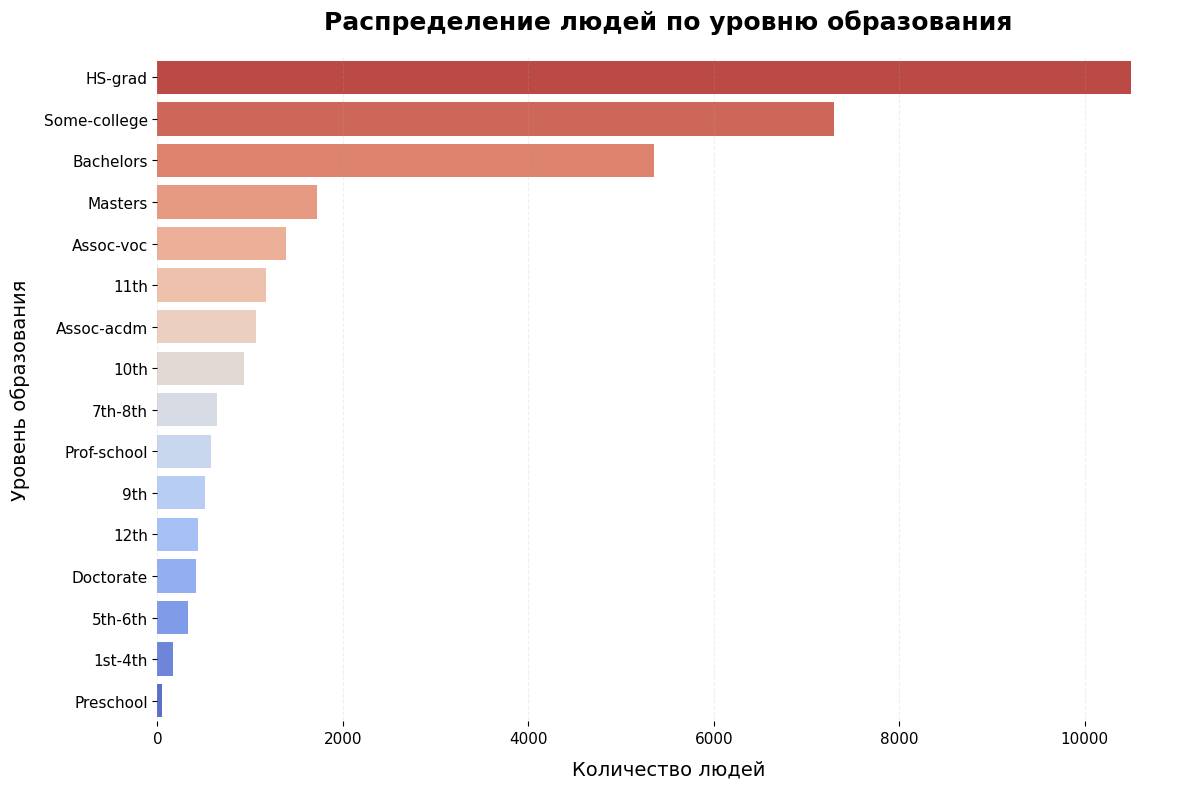

In [60]:
plt.figure(figsize=(12, 8))

# Создаем график
ax = sns.countplot(data=df, y='education',
                   order=df['education'].value_counts().index,
                   palette='coolwarm_r',      # цветовая палитра
                   saturation=0.8)         # насыщенность цветов

# Добавляем заголовок и подписи
plt.title('Распределение людей по уровню образования',
          fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Количество людей', fontsize=14, labelpad=10)
plt.ylabel('Уровень образования', fontsize=14, labelpad=10)

# Настраиваем внешний вид
plt.grid(axis='x', alpha=0.2, linestyle='--')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Убираем рамку
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()

**Задание 10: А теперь давайте посмотрим на распределение возрастов. Сколько возрастных отрезков имеют больше 1600 значений? (Одним "отрезков" является один столбец при стандартных настройках seaborn/matplotlib)
P.S. Необязательное задание, хотя лучше сделать, если собираетесь сдавать до мягкого, я хоты бы посмотрю**

Количество возрастных отрезков с более чем 1600 значениями: 6


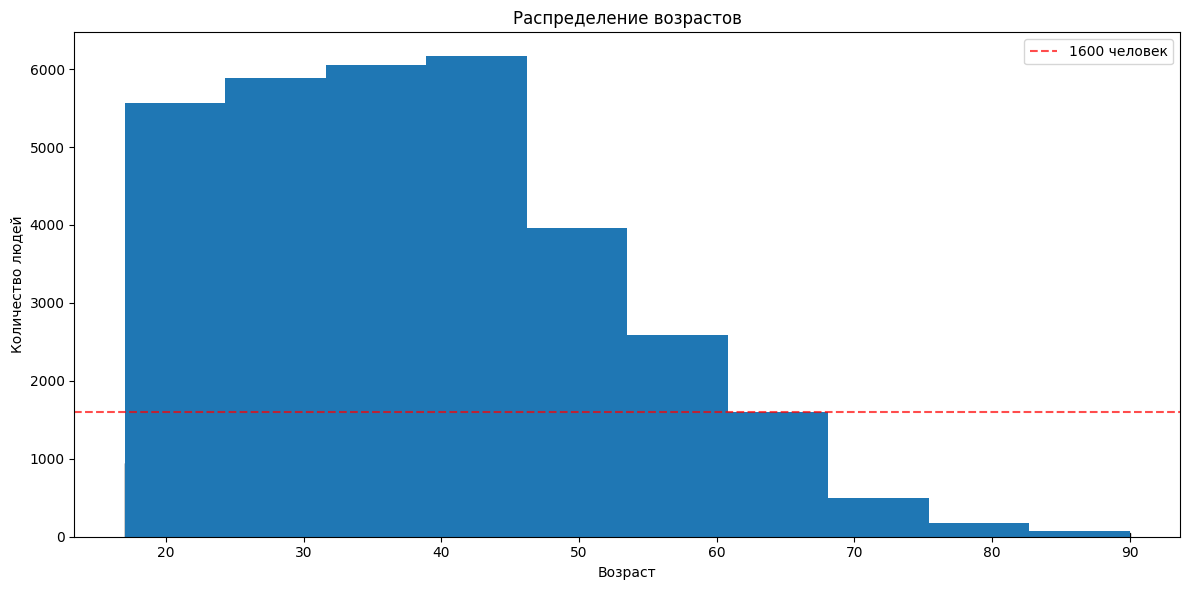

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))
ax = sns.histplot(data=df, x='age')

plt.title('Распределение возрастов')
plt.xlabel('Возраст')
plt.ylabel('Количество людей')

# Получаем данные о столбцах гистограммы
n, bins, patches = ax.hist(df['age'].dropna())

plt.axhline(y=1600, color='red', linestyle='--', alpha=0.7, label='1600 человек')
plt.legend()

# Считаем количество отрезков с более чем 1600 значениями
count_above_1600 = np.sum(n > 1600)
print("Количество возрастных отрезков с более чем 1600 значениями:", count_above_1600)

plt.tight_layout()
plt.show()